### **📊3Cycle**

In [1]:
import pandas as pd

# 데이터 불러오기
c_df = pd.read_csv("./datasets/Concrete Compressive Strength.csv")

In [2]:
# 데이터 중복행 삭제
c_df = c_df.drop_duplicates()
# 2cycle 데이터 컬럼 삭제
pre_c3_df = c_df.drop(labels=['Coarse Aggregate', 'Water', 'Fly Ash', 'Fine Aggregate'], axis=1).reset_index(drop=True)

In [4]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# 데이터 세트 분리
features, targets = pre_c3_df.iloc[:, :-1], pre_c3_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

xgb_r = XGBRegressor()

# 파라미터 값 조정
parameters = {'learning_rate': [0.1, 0.15, 0.2, 0.3], 'n_estimators': [150, 200, 250]}

# 교차검증
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

# 학습 및 교차 검증 모델 설정
grid_xgb_r = GridSearchCV(xgb_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)

# 훈련
grid_xgb_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    in...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.15, 0.2, 0.3],
                         'n_estimators': [150, 200, 250]},
             scoring='neg_mean_squared_error')

In [5]:
# 훈련 결과 확인
result_df = pd.DataFrame(grid_xgb_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  \
0    {'learning_rate': 0.1, 'n_estimators': 150}       -30.213877   
1    {'learning_rate': 0.1, 'n_estimators': 200}       -30.046410   
2    {'learning_rate': 0.1, 'n_estimators': 250}       -29.814635   
3   {'learning_rate': 0.15, 'n_estimators': 150}       -30.667052   
4   {'learning_rate': 0.15, 'n_estimators': 200}       -30.812818   
5   {'learning_rate': 0.15, 'n_estimators': 250}       -30.979721   
6    {'learning_rate': 0.2, 'n_estimators': 150}       -30.684925   
7    {'learning_rate': 0.2, 'n_estimators': 200}       -30.901663   
8    {'learning_rate': 0.2, 'n_estimators': 250}       -30.975052   
9    {'learning_rate': 0.3, 'n_estimators': 150}       -30.721629   
10   {'learning_rate': 0.3, 'n_estimators': 200}       -31.068103   
11   {'learning_rate': 0.3, 'n_estimators': 250}       -31.223691   

    rank_test_score  
0                 3  
1                 2  
2                 1  
3                 4  
4                 7  
5                10  
6                 5  
7                 8  
8                 9  
9                 6  
10               11  
11               12

In [6]:
# 최적의 모델 담기
xgb = grid_xgb_r.best_estimator_
# 예측
prediction = xgb.predict(X_test)

In [8]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [9]:
# 평가
get_evaluation(y_test, prediction)

MSE: 23.5378, RMSE: 4.8516, MSLE: 0.0266, RMSLE: 0.1632, R2: 0.9077


MSE: 3.3126, RMSE: 1.8201, MSLE: 0.0036, RMSLE: 0.0599, R2: 0.9876


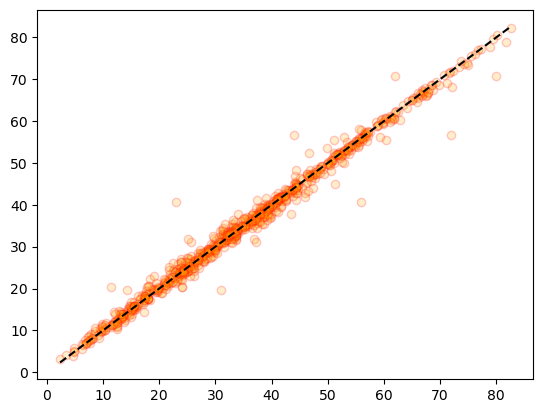

In [11]:
import matplotlib.pyplot as plt

prediction = xgb.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 23.5378, RMSE: 4.8516, MSLE: 0.0266, RMSLE: 0.1632, R2: 0.9077


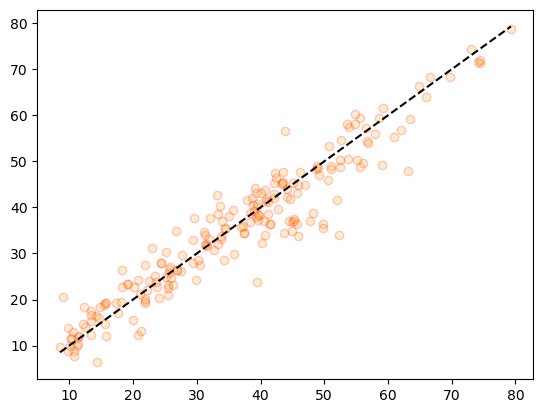

In [12]:
import matplotlib.pyplot as plt

prediction = xgb.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

### **📌결론**
>   
>   

In [ ]:
# 최적의 파라미터를 적용한 모델의 결과는 다음과 같다
# 과적합이 발생하지 않았으며 다중공선성이 해소된 신뢰도있는 모델이라고 할 수 있다